In [1]:
import fnmatch
from cv2 import equalizeHist
import pandas as pd
import os
import pydicom
import json
import cv2 
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
from PIL import Image
import fnmatch
import glob
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import numpy as np

In [3]:

def plot_image(image, boxes_1,boxes_2,class_labels,name_1,name_2,is_normal_1,is_normal_2, density_level_1,density_level_2):
    """Plots predicted bounding boxes on the image"""
    cmap = plt.get_cmap("tab20b")
    colors = [cmap(i) for i in np.linspace(0, 1, len(class_labels)+1)]
    im = np.array(image)
    #print(im.shape)
    height, width,_= im.shape

    # Create figure and axes
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(14.5, 7, forward=True)

    # Display the image
    ax[0].imshow(im)

    # box[0] is x midpoint, box[2] is width
    # box[1] is y midpoint, box[3] is height
    # Create a Rectangle patch
    my_handles=[]
    present_classes=[]
    for box in boxes_1:
        print("inside fun",len(box),box)
        assert len(box) == 6, "box should contain  class_indx,score,x_c, y_c, w_c, h_c class"
        class_pred = box[0]
        #box = box[2:]
        x_min,y_min,w,h=box[2:6]
        
        #print(x_c,y_c,x_min,y_min,w,h)
        rect = patches.Rectangle(
            (x_min,y_min),
            w,
            h,
            linewidth=1,
            edgecolor=colors[int(class_pred)],
            facecolor="none",
        )
        # Add the patch to the Axes
        ax[0].add_patch(rect)
        
        
        plt.text(
            5*int(class_pred),
            0,
            s=class_labels[int(class_pred)],
            color="white",
            verticalalignment="top",
            bbox={"color": colors[int(class_pred)], "pad": 0},
            animated=True
        )
        if class_pred not in present_classes:
            my_handles.append(mpatches.Patch(color=colors[int(class_pred)], label=class_labels[int(class_pred)]+", BIRADS - "+str(box[1])))
            present_classes.append(class_pred)
    if(density_level_2!= -1):
        my_handles.append(mpatches.Patch(color=colors[len(class_labels)], label="Density Level - "+str(density_level_1)))
    ax[0].legend(handles=my_handles, loc=(1.04,0))
    # Create figure and axes for doctor2
    title_1="Annotation by: "+name_1 + ("Annotated Normal" if  is_normal_2 else "")
    ax[0].set_title(title_1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ###
    ax[1].imshow(im)

    # box[0] is x midpoint, box[2] is width
    # box[1] is y midpoint, box[3] is height
    # Create a Rectangle patch
    my_handles_2=[]
    present_classes_2=[]
    for box in boxes_2:
        print("inside fun",len(box),box)
        assert len(box) == 6, "box should contain  class_indx,score,x_c, y_c, w_c, h_c class"
        class_pred = box[0]
        #box = box[2:]
        x_min,y_min,w,h=box[2:6]
        
        #print(x_c,y_c,x_min,y_min,w,h)
        rect = patches.Rectangle(
            (x_min,y_min),
            w,
            h,
            linewidth=1,
            edgecolor=colors[int(class_pred)],
            facecolor="none",
        )
        # Add the patch to the Axes
        ax[1].add_patch(rect)
        
        
        plt.text(
            5*int(class_pred),
            0,
            s=class_labels[int(class_pred)],
            color="white",
            verticalalignment="top",
            bbox={"color": colors[int(class_pred)], "pad": 0},
            animated=True
        )
        if class_pred not in present_classes_2:
            my_handles_2.append(mpatches.Patch(color=colors[int(class_pred)], label=class_labels[int(class_pred)]+", BIRADS - "+str(box[1])))
            present_classes_2.append(class_pred)
    if(density_level_2!= -1):
        my_handles_2.append(mpatches.Patch(color=colors[len(class_labels)], label="Density Level - "+str(density_level_2)))
    ax[1].legend(handles=my_handles_2, loc=(1.04,0))
    title_2="Annotation by: "+name_2 + ("Annotated Normal" if  is_normal_2 else "")
    print(title_2)
    ax[1].set_title(title_2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    #plt.show()
    plt.savefig('pltsave.png')

##declare annotation files


In [20]:
class_names=["Mass","Calcification", "Architectureal Distortion", "Asymmetry", "Ductal Dialtion", "Skin Tichening", "Nipple Retraction", "Lymphnode"]
birads_level_names=["BI-RADS 2", "BI-RADS 3","BI-RADS 4", "BI-RADS 5"]
data_directory_1 = "/Volumes/MLData/Paulis_Annotation/mammo__1W"
data_directory_2 = "/Volumes/0973111473/Paulis_annotation2/Mammo__1Betty"
joined_data="/Users/sam/Desktop/new extraction/mammo1.csv"
ann2 = pd.read_csv(joined_data)
first_doctor="Wube"
second_doctor="Betty"

PAT_Pl_009874 00-CC-R.dcm
processing file 0 of  1624
[[1071, 1935], [1597, 1370], [1544, 1298], [1032, 1274], [868, 1496], [680, 1752], [675, 1978]]
got here [[3, 3, 675, 1274, 923, 705]]
annotations plotted
[[732, 1445], [734, 1443], [738, 1444], [739, 1446], [737, 1449], [734, 1449]]
annotations plotted
inside fun 6 [3, 3, 675, 1274, 923, 705]
inside fun 6 [1, 2, 732, 1443, 8, 7]
Annotation by: Betty


KeyboardInterrupt: Interrupted by user

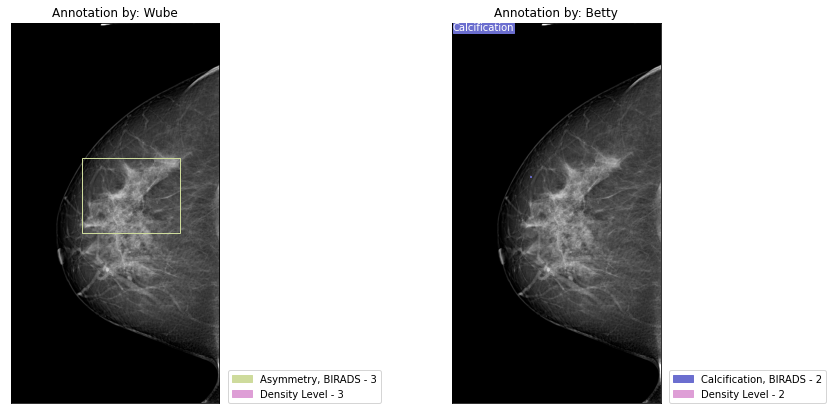

In [22]:
for index, row in ann2.iterrows():
    indx=row['indx']
    folder_name=indx.split("-")[0]
    file_name=indx.split("-")[1]+"-"+indx.split("-")[2]+"-"+indx.split("-")[3][:-5]
    print(folder_name,file_name)
    is_normal_1=is_normal_2=False
    density_level_1=density_level_2=-1
    try: 
        print("processing file", index, "of ", len(ann2.index))
        impath= os.path.join(data_directory_1, folder_name,file_name)
        #im_save_path=os.path.join(destination_directory,str(im_counter)+"_"+filename[:-4]+".png")
        #print(impath)
        
        json_path_1=os.path.join(data_directory_1,folder_name,file_name+".json")
        json_path_2=os.path.join(data_directory_2,folder_name,file_name+".json")
        

        ds = pydicom.dcmread(impath, force=True)
        img= ds.pixel_array.astype(float)
        
        if 'WindowWidth' in ds:
            #print('Dataset has windowing')
            windowed  = apply_voi_lut(ds.pixel_array, ds)
            #plt.imshow(windowed, cmap="gray", vmax=windowed.max(), vmin=windowed.min)
            #plt.show()
            img=windowed.astype(float)
            #return "windowed"
        # Convert to uint
        img = (np.maximum(img,0) / img.max()) * 255.0
        img= np.uint8(img)
        img = cv2.merge([img,img,img])
        #img = cv2.COLOR_GRAY2RGB()
        #(ori_h,ori_w)=img.shape
        boxes_1=[]
        
        boxes_2=[]
        try:
            f1 = open(json_path_1) 
            #f2 = open(json_path_2)
            annotations=json.load(f1)
            
            for annotation in annotations:
                #print(annotation)
                #print(np.array2string(np.array(annotation['poly']), precision=2, separator=',',suppress_small=True))
                ori_w=annotation["width"]
                ori_h=annotation["height"]
                #print(annotation["label"],annotation["label_name"])
                
                if(annotation["label"]!=8 and annotation["label_name"]!="Normal"):
                    try:
                        print(annotation['poly'])
                        #current_label=annotation["label"] if annotation["label"]<3 else (annotation["label"]-1)
                        
                        x,y,w,h = cv2.boundingRect(np.asarray(annotation['poly']))
                        boxes_1.append([int(annotation["label"]),annotation["BIRADS_level"],x,y,w,h])
                        print("got here",boxes_1)
                    except Exception as e:
                        print("error occured processing",json_path_1)
                    #print(df_loc["label"][0])
                if(annotation["label"]==8):
                    density_level_1=annotation["Density_level"]
                if (annotation["label_name"]=="Normal"):
                    is_normal_1=False

            f1.close()
            
            if len(boxes_1)>0:  
                #plt.show()
                print("annotations plotted")
                test=1
            else: 
                print(f"No annotation by {first_doctor}")
            
        except BaseException as err:
                print(f"Unexpected {err=}, {type(err)=}")
                raise
        try:
            f2 = open(json_path_2)
            annotations=json.load(f2)
            
            for annotation in annotations:
                #print(annotation)
                #print(np.array2string(np.array(annotation['poly']), precision=2, separator=',',suppress_small=True))
                ori_w=annotation["width"]
                ori_h=annotation["height"]
                if(annotation["label"]!=8 and annotation["label_name"]!="Normal" and annotation["label"]!=3):
                    try:
                        print(annotation['poly'])
                        #current_label=annotation["label"] if annotation["label"]<3 else (annotation["label"]-1) 
                        x,y,w,h = cv2.boundingRect(np.asarray(annotation['poly']))
                        boxes_2.append([int(annotation["label"]),annotation["BIRADS_level"],x,y,w,h])
                        #print("got here",boxes_1)
                    except Exception as e:
                        print("error occured processing", json_path_2)
                    #print(df_loc["label"][0])
                if(annotation["label"]==8):
                    density_level_2=annotation["Density_level"]
                if (annotation["label_name"]=="Normal"):
                    is_normal_2=False

            f2.close()
            #plot_image(img, boxes_2,class_names,second_doctor)
            if len(boxes_2)>0:  
                #plt.show()
                print("annotations plotted")
                
            else: 
                print(f"No annotation by {second_doctor}")
            
        except BaseException as err:
                print(f"Unexpected {err=}, {type(err)=}")
                raise
        plot_image(img, boxes_1,boxes_2,class_names,first_doctor, second_doctor,is_normal_1,is_normal_2,density_level_1,density_level_2)
        input("Press Enter to continue...")
    except Exception as e:
        print("General error Occured at the end",e)     
    break

In [2]:
import cv2 as cv
#read the image
img = cv.imread("shapes.jpeg")
#convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#blur image to reduce the noise in the image while thresholding. #This smoothens the sharp edges in the image.
blur = cv.blur(gray, (10,10))
#Apply thresholding to the image
ret, thresh = cv.threshold(blur, 1, 255, cv.THRESH_OTSU)
#find the contours in the image
contours, heirarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#draw the obtained contour lines(or the set of coordinates forming a line) on the original image
print(contours)
cv.drawContours(img, contours, -1, (0,255,0), 20)
#show the image
cv.namedWindow('Contours',cv.WINDOW_NORMAL)
cv.namedWindow('Thresh',cv.WINDOW_NORMAL)
cv.imshow('Contours', img)
cv.imshow('Thresh', thresh)
if cv.waitKey(0):
    cv.destroyAllWindows()

(array([[[  0,   0]],

       [[  0, 471]],

       [[639, 471]],

       [[639,   0]]], dtype=int32), array([[[156, 219]],

       [[157, 218]],

       [[159, 218]],

       [[160, 219]],

       [[161, 219]],

       [[165, 223]],

       [[165, 229]],

       [[166, 230]],

       [[166, 240]],

       [[167, 241]],

       [[167, 250]],

       [[168, 251]],

       [[168, 261]],

       [[169, 262]],

       [[169, 271]],

       [[170, 272]],

       [[170, 281]],

       [[171, 282]],

       [[171, 291]],

       [[172, 292]],

       [[172, 302]],

       [[173, 303]],

       [[173, 312]],

       [[174, 313]],

       [[174, 323]],

       [[175, 324]],

       [[175, 333]],

       [[176, 334]],

       [[176, 343]],

       [[177, 344]],

       [[177, 354]],

       [[176, 355]],

       [[176, 356]],

       [[171, 361]],

       [[170, 361]],

       [[169, 362]],

       [[168, 362]],

       [[167, 363]],

       [[165, 363]],

       [[164, 364]],

       [[163, 364